In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(0)
plt.style.use("ggplot")

import tensorflow as tf
print('Tensorflow version:', tf.__version__)
print('GPU detected:', tf.config.list_physical_devices('GPU'))

Tensorflow version: 2.8.2
GPU detected: []


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving ner_dataset.csv to ner_dataset.csv


In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("ner_dataset.csv", encoding="latin1")
data = data.fillna(method="ffill")
data.head(20)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


In [ ]:
print("Unique words in corpus:", data['Word'].nunique())
print("Unique tags in corpus:", data['Tag'].nunique())

Unique words in corpus: 35178
Unique tags in corpus: 17


In [ ]:
words = list(set(data["Word"].values))
words.append("ENDPAD")
num_words = len(words)

In [ ]:
tags = list(set(data["Tag"].values))
num_tags = len(tags)

In [ ]:
num_words, num_tags

(35179, 17)

In [ ]:
class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [ ]:
getter = SentenceGetter(data)
sentences = getter.sentences

In [ ]:
sentences[0]

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

In [ ]:
sentences[1]

[('Iranian', 'JJ', 'B-gpe'),
 ('officials', 'NNS', 'O'),
 ('say', 'VBP', 'O'),
 ('they', 'PRP', 'O'),
 ('expect', 'VBP', 'O'),
 ('to', 'TO', 'O'),
 ('get', 'VB', 'O'),
 ('access', 'NN', 'O'),
 ('to', 'TO', 'O'),
 ('sealed', 'JJ', 'O'),
 ('sensitive', 'JJ', 'O'),
 ('parts', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('the', 'DT', 'O'),
 ('plant', 'NN', 'O'),
 ('Wednesday', 'NNP', 'B-tim'),
 (',', ',', 'O'),
 ('after', 'IN', 'O'),
 ('an', 'DT', 'O'),
 ('IAEA', 'NNP', 'B-org'),
 ('surveillance', 'NN', 'O'),
 ('system', 'NN', 'O'),
 ('begins', 'VBZ', 'O'),
 ('functioning', 'VBG', 'O'),
 ('.', '.', 'O')]

In [ ]:
word2idx = {w: i + 1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [ ]:
word2idx

{'investigative': 1,
 'Haidari': 2,
 'Travel': 3,
 'Tsushko': 4,
 'Monday': 5,
 'Douste-Blazy': 6,
 'Skubiszewski': 7,
 'staunchest': 8,
 'Andreas': 9,
 'anti-THAKSIN': 10,
 'Indra': 11,
 'Lincoln': 12,
 'prolong': 13,
 'Chernobyl': 14,
 'Okada': 15,
 'Boulevard': 16,
 'firmer': 17,
 'types': 18,
 'torn': 19,
 '187': 20,
 'reporting': 21,
 'double-taxation': 22,
 '2004': 23,
 'Ministry': 24,
 'Jacqui': 25,
 'organization': 26,
 'Garzon': 27,
 'sabotaging': 28,
 'Udhampur': 29,
 'Mlyn': 30,
 'recalls': 31,
 'bomb-grade': 32,
 'Turkish': 33,
 'reinvest': 34,
 'researcher': 35,
 'might': 36,
 '1000': 37,
 'China-North': 38,
 'pursuit': 39,
 'fishery': 40,
 'heralds': 41,
 '1853': 42,
 'masks': 43,
 'Continuing': 44,
 'through': 45,
 'A9': 46,
 'canister': 47,
 'constitutionally': 48,
 'baptismal': 49,
 'breaches': 50,
 'fully': 51,
 'Moin': 52,
 'Frears': 53,
 'EDC': 54,
 'Mazda': 55,
 'Even': 56,
 'absorb': 57,
 'Afghan-coalition': 58,
 'public': 59,
 'Bazian': 60,
 'Doumgor': 61,
 'bana

In [ ]:
tag2idx

{'B-per': 0,
 'B-art': 1,
 'B-eve': 2,
 'B-gpe': 3,
 'O': 4,
 'I-eve': 5,
 'B-tim': 6,
 'B-geo': 7,
 'B-nat': 8,
 'I-tim': 9,
 'I-per': 10,
 'I-gpe': 11,
 'I-nat': 12,
 'I-geo': 13,
 'I-org': 14,
 'I-art': 15,
 'B-org': 16}

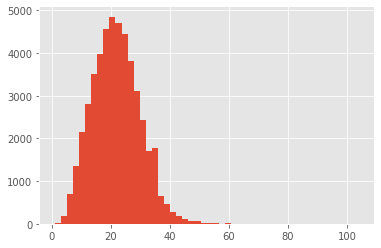

In [ ]:
plt.hist([len(s) for s in sentences], bins=50)
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 50

X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=num_words-1)

y = [[tag2idx[w[2]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional

In [ ]:
input_word = Input(shape=(max_len,))
model = Embedding(input_dim=num_words, output_dim=50, input_length=max_len)(input_word)
model = SpatialDropout1D(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(num_tags, activation="softmax"))(model)
model = Model(input_word, out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 50)            1758950   
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 50)           0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 50, 200)          120800    
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 50, 17)           3417      
 ibuted)                                                         
                                                             

In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 11.4 MB/s 


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.tf_keras import PlotLossesCallback
import gc
gc.collect(),gc.collect()
from livelossplot import PlotLossesKeras
import keras
from keras.models import load_model

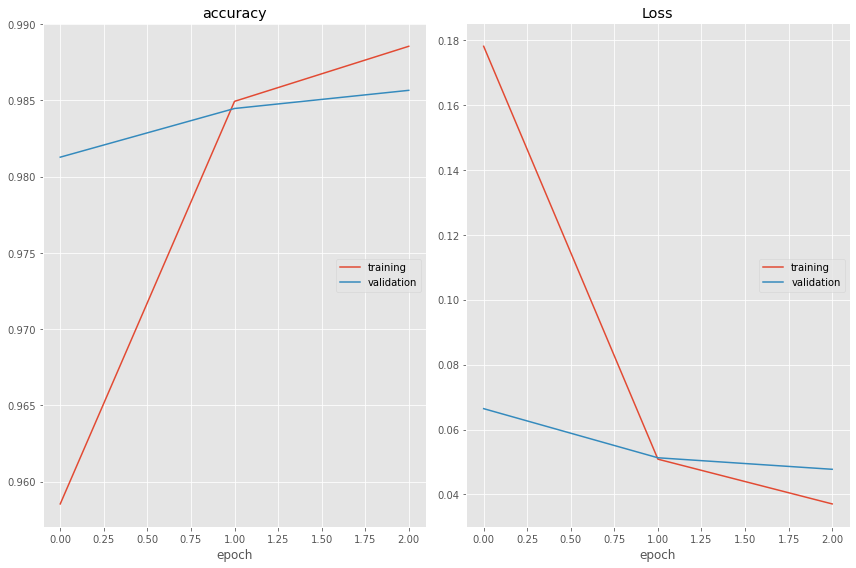

accuracy
	training         	 (min:    0.959, max:    0.989, cur:    0.989)
	validation       	 (min:    0.981, max:    0.986, cur:    0.986)
Loss
	training         	 (min:    0.037, max:    0.178, cur:    0.037)
	validation       	 (min:    0.048, max:    0.066, cur:    0.048)

Epoch 3: val_loss improved from 0.05130 to 0.04776, saving model to model_weights.h5
1199/1199 [==============================] - 258s 215ms/step - loss: 0.0371 - accuracy: 0.9885 - val_loss: 0.0478 - val_accuracy: 0.9857
CPU times: user 23min 8s, sys: 44.6 s, total: 23min 53s
Wall time: 13min 26s


In [ ]:
%%time

chkpt = ModelCheckpoint("model_weights.h5", monitor='val_loss',verbose=1, save_best_only=True, save_weights_only=True, mode='min')

early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=1, verbose=0, mode='max', baseline=None, restore_best_weights=False)

callbacks = [PlotLossesCallback(), chkpt, early_stopping]

history = model.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_test,y_test),
    batch_size=32, 
    epochs=3,
    callbacks=callbacks,
    verbose=1
)

In [ ]:
model.evaluate(x_test, np.array(y_test))

300/300 [==============================] - 9s 30ms/step - loss: 0.0478 - accuracy: 0.9857


[0.04775892570614815, 0.9856547117233276]

In [ ]:
pred=model.predict(x_test)

In [ ]:
i = np.random.randint(0, x_test.shape[0]) #659
p = model.predict(np.array([x_test[i]]))
p = np.argmax(p, axis=-1)
y_true = y_test[i]
print("{:15}{:5}\t {}\n".format("Word", "True", "Pred"))
print("-" *30)
for w, true, pred in zip(x_test[i], y_true, p[0]):
    print("{:15}{}\t{}".format(words[w-1], tags[true], tags[pred]))
    #idx += 1
    #if idx == 15:
      #break

Word           True 	 Pred

------------------------------
The            O	O
United         B-geo	B-geo
States         I-geo	I-geo
has            O	O
103            O	O
nuclear        O	O
power          O	O
plants         O	O
in             O	O
31             O	B-tim
states         O	O
.              O	O
Nobel-Prize    O	O
Nobel-Prize    O	O
Nobel-Prize    O	O
Nobel-Prize    O	O
Nobel-Prize    O	O
Nobel-Prize    O	O
Nobel-Prize    O	O
Nobel-Prize    O	O
Nobel-Prize    O	O
Nobel-Prize    O	O
Nobel-Prize    O	O
Nobel-Prize    O	O
Nobel-Prize    O	O
Nobel-Prize    O	O
Nobel-Prize    O	O
Nobel-Prize    O	O
Nobel-Prize    O	O
Nobel-Prize    O	O
Nobel-Prize    O	O
Nobel-Prize    O	O
Nobel-Prize    O	O
Nobel-Prize    O	O
Nobel-Prize    O	O
Nobel-Prize    O	O
Nobel-Prize    O	O
Nobel-Prize    O	O
Nobel-Prize    O	O
Nobel-Prize    O	O
Nobel-Prize    O	O
Nobel-Prize    O	O
Nobel-Prize    O	O
Nobel-Prize    O	O
Nobel-Prize    O	O
Nobel-Prize    O	O
Nobel-Prize    O	O
Nobel-Prize    O	O
Nobel-Pri

In [ ]:
model.save('/content/drive/MyDrive/nameentity.h5')

In [ ]:
def text_process(text):
    seq = []
    for w in text.split():
        try:
            seq.append(word2idx[w])
        except:
            seq.append(num_words-1)

    sz = len(seq)
    # print(seq)
    for _ in range(sz, 50):
        seq.append(num_words-1)
    seq = np.array(seq, dtype=int)
    return seq, sz

In [ ]:
def get_ner(text):
    seq, sz = text_process(text)
    
    p = model.predict(np.array([seq]))
    p = np.argmax(p, axis=-1)

    idx = 0
    for w, pred in zip(seq, p[0]):
        if tags[pred] != 'O':
            print("{:15}\t{}".format(words[w-1], tags[pred]))
        idx += 1
        if idx == sz:
            break

In [ ]:
get_ner('Albert Einstein dünyanın gelmiş geçmiş en iyi fizikçilerindendir.')

Albert         	B-per


In [ ]:
get_ner('Grammy ödülleri Fransa Devlet Başkanı tarafından verildi.')

In [ ]:
get_ner('Futbolda dünya kupası Brezilyanın oldu.')

In [ ]:
get_ner('Türkiye Büyük Millet Meclisi')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print('Max val_acc achieved: %.2f' %(max(history.history['val_accuracy'])*100), '%')
print('Max acc achieved: %.2f' %(max(history.history['accuracy'])*100), '%')

Max val_acc achieved: 98.57 %
Max acc achieved: 98.85 %


In [ ]:
print('Final val_acc achieved: %.2f' %(history.history['val_accuracy'][-1]*100), '%')
print('Final acc achieved: %.2f' %(history.history['accuracy'][-1]*100), '%')

Final val_acc achieved: 98.57 %
Final acc achieved: 98.85 %


In [ ]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('Mean of validation accuracy', val_accuracy*100))


Mean of validation accuracy: 98.38%


In [ ]:
model.input_shape

(None, 50)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred = (y_pred > 0.5)
y_pred

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [ ]:
# Score
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# save model and architecture to single file
model.save('namedentity.h5')
model.summary()

print("Saved model to disk")

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 50)            1758950   
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 50)           0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 50, 200)          120800    
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 50, 17)           3417      
 ibuted)                                                         
                                                             

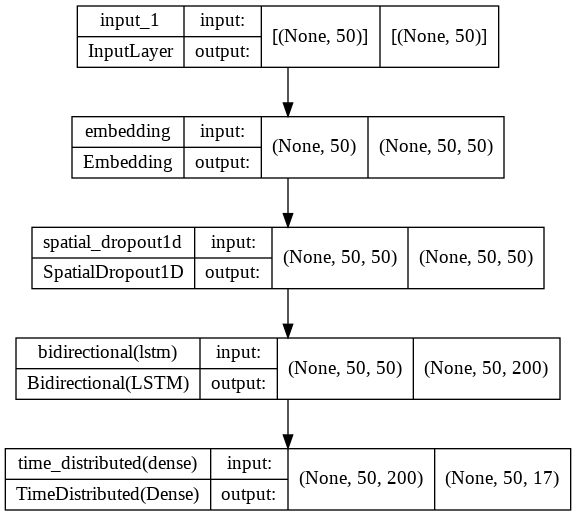

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot_CNN.png', show_shapes=True, show_layer_names=True)

In [ ]:
%%writefile app.py
#Necessary imports
import streamlit as st
import nltk
import pandas as pd
from matplotlib import pyplot as plt
from textblob import TextBlob
from nltk.tokenize import sent_tokenize
from gensim.summarization.summarizer import summarize 

import spacy
nlp = spacy.load("en_core_web_sm")


from collections import Counter




#Headings for Web Application
st.title("Natural Language Processing Web Application Name Entity Recognition")
st.subheader("What type of NLP service would you like to use?")

#Picking what NLP task you want to do
option = st.selectbox('NLP Service',('Entity Extraction','None')) #option is stored in this variable

#Textbox for text user is entering
st.subheader("Enter the text you'd like to analyze.")
text = st.text_input('Enter text') #text is stored in this variable

#Display results of the NLP task
st.header("Results")

#Function to take in dictionary of entities, type of entity, and returns specific entities of specific type
def entRecognizer(entDict, typeEnt):
    entList = [ent for ent in entDict if entDict[ent] == typeEnt]
    return entList




  

#Named Entity Recognition
if option == 'Entity Extraction':

    #Getting Entity and type of Entity
    entities = []
    entityLabels = []
    doc = nlp(text)
    for ent in doc.ents:
        entities.append(ent.text)
        entityLabels.append(ent.label_)
    entDict = dict(zip(entities, entityLabels)) #Creating dictionary with entity and entity types

    #Using function to create lists of entities of each type
    entOrg = entRecognizer(entDict, "ORG")
    entCardinal = entRecognizer(entDict, "CARDINAL")
    entPerson = entRecognizer(entDict, "PERSON")
    entDate = entRecognizer(entDict, "DATE")
    entGPE = entRecognizer(entDict, "GPE")

    #Displaying entities of each type
    st.write("Organization Entities: " + str(entOrg))
    st.write("Cardinal Entities: " + str(entCardinal))
    st.write("Personal Entities: " + str(entPerson))
    st.write("Date Entities: " + str(entDate))
    st.write("GPE Entities: " + str(entGPE))





st.text("")
st.text("")
st.text("")
st.markdown("***")
#---------------------------------#
# About
expander_bar = st.expander("About")
expander_bar.markdown("""
Kartikey Sharma, Student, Department of Computer Engineering
""")

Overwriting app.py


In [ ]:
i!pip install streamlit==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!ngrok authtoken 24ualhTQOrAYZyD9kgUeY693hak_2TJFYWottqmXhmmT7PUJb

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!nohup streamlit run  app.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
url=ngrok.connect(port='8050')
url

<NgrokTunnel: "http://59e3-35-197-120-79.ngrok.io" -> "http://localhost:80">

In [ ]:
!streamlit run --server.port 80 app.py

2022-09-02 13:07:07.118 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:80
  External URL: http://35.197.120.79:80

2022-09-02 13:07:09.419 'pattern' package not found; tag filters are not available for English
2022-09-02 13:07:12.912845: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
  Stopping...
^C
